# 特征理解

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 正常显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'

In [53]:
temperature = pd.read_csv('Feature Engineering-0912/data/GlobalLandTemperaturesByCity.csv')
salary = pd.read_csv('Feature Engineering-0912/data/Salary_Ranges_by_Job_Classification.csv')

In [54]:
# 查看数据
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [55]:
salary.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [56]:
temperature.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [57]:
temperature.describe(include='all')

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
count,8599212,8.235082e+06,8.235082e+06,8599212,8599212,8599212,8599212
unique,3239,NaN,NaN,3448,159,73,1227
top,1942-09-01,NaN,NaN,Springfield,India,36.17N,139.23E
freq,3510,NaN,NaN,9545,1014906,425455,129600
mean,NaN,1.672743e+01,1.028575e+00,NaN,NaN,NaN,NaN
std,NaN,1.035344e+01,1.129733e+00,NaN,NaN,NaN,NaN
min,NaN,-4.270400e+01,3.400000e-02,NaN,NaN,NaN,NaN
25%,NaN,1.029900e+01,3.370000e-01,NaN,NaN,NaN,NaN
50%,NaN,1.883100e+01,5.910000e-01,NaN,NaN,NaN,NaN
75%,NaN,2.521000e+01,1.349000e+00,NaN,NaN,NaN,NaN


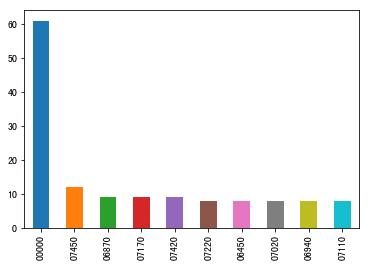

In [58]:
# 绘制条形图
salary['Grade'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')

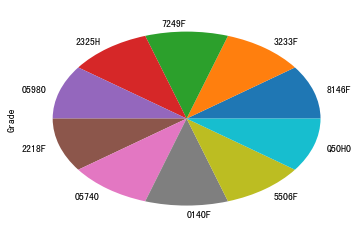

In [59]:
# 绘制饼图
salary['Grade'].value_counts().sort_values().head(10).plot(kind = 'pie')

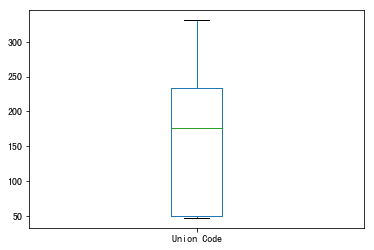

In [60]:
# 绘制箱体图
salary['Union Code'].value_counts().sort_values(ascending = False).head(5).plot(kind = 'box')

In [61]:
# 查看温度的数据

# 日期转换,将dt 转换成月份，再将中国的年份转换成世纪
temperature['dt'] = pd.to_datetime(temperature['dt'])
temperature['year'] = temperature['dt'].apply(lambda x : x.year)
temperature.head()

# 为每个世纪 绘制平均温度的直方图（中国的）
climate_china = temperature.loc[temperature['Country'] == 'China']
climate_china['Century'] = climate_china['year'].map(lambda x: int(x/100+1))
climate_china.head()

/Users/wh-js/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,Century
11925,1820-08-01,20.146,2.286,Ürümqi,China,44.20N,87.20E,1820,19
11926,1820-09-01,15.331,1.775,Ürümqi,China,44.20N,87.20E,1820,19
11927,1820-10-01,5.256,1.848,Ürümqi,China,44.20N,87.20E,1820,19
11928,1820-11-01,-4.956,2.190,Ürümqi,China,44.20N,87.20E,1820,19
11929,1820-12-01,-14.118,2.581,Ürümqi,China,44.20N,87.20E,1820,19


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f429080>,
      dtype=object)

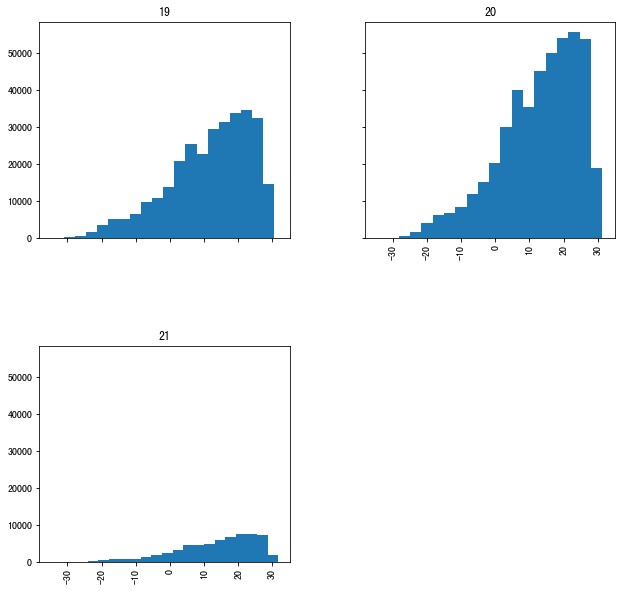

In [62]:
# 为每个世纪 绘制平均温度的直方图（中国的）
climate_china['AverageTemperature'].hist(by = climate_china['Century'],
                                        sharex = True,
                                        sharey = True,
                                        figsize = (10,10),
                                        bins = 20)

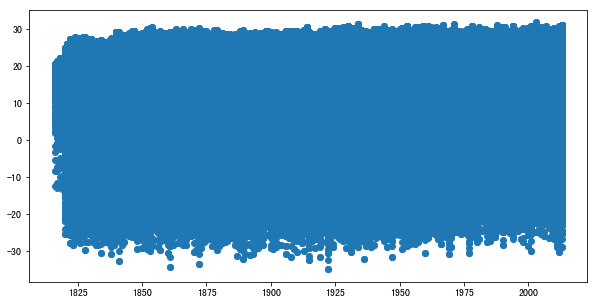

In [63]:
# 绘制散点图，查看中国的年份和温度之间的关系
x  = climate_china['year']
y = climate_china['AverageTemperature']

fig,ax = plt.subplots(figsize = (10,5))
ax.scatter(x,y)

# 特征增强

In [64]:
# 检查缺失值的个数 
temperature.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
year                                  0
dtype: int64

In [65]:
# 移除缺失值
temperature.dropna(inplace = True)

In [66]:
# 导入第三个数据集(皮马印第安人糖尿病预测数据集)
pima_columns = ['times_pregment','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness',
                'serum_insulin','bmi','pedigree_function','age','onset_disbetes']
pima = pd.read_csv('Feature Engineering-0912/data/pima.data',names = pima_columns)
pima.head()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
pima.describe()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


根据上面的 describe 数值，结合25%，50%，75%，以及最大，最小值，和变量的定义，能够很明显地看出plasma_glucose_concentration	diastolic_blood_pressure，triceps_thickness，serum_insulin，bmi 这几列的数值被认为地使用0进行了填充，我们需要将其还原，并将这些缺失值删除掉

In [68]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x: x if x != 0 else None)
pima['serum_insulin'].isnull().sum()

374

In [69]:
# 统一对上述的人为处理过的缺失值进行还原
columns = ['serum_insulin','bmi','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness']
for col in columns:
    pima[col].replace([0],[None],inplace = True)

pima.isnull().sum()

times_pregment                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_disbetes                    0
dtype: int64

In [75]:
# 删除含有缺失值的行
dropped_pima = pima.dropna()
num_rows_lost = round(100*((pima.shape[0]-dropped_pima.shape[0])/pima.shape[0]))
print("保留了原先{}% 的行".format(num_rows_lost))

保留了原先49% 的行


Text(0,0.5,'% change')

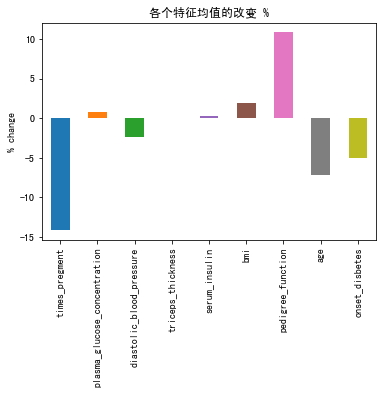

In [76]:
# 查看下 删除行 之后，各个特征值均值之间的差异
ax = (100*(dropped_pima.mean()-pima.mean())/pima.mean()).plot(kind = 'bar',title = '各个特征均值的改变 %')
ax.set_ylabel('% change')

In [83]:
# 使用sklearn 的 Pipeline 以及 Imputer 来实现缺失值填充
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer

# 调参候选
knn_params = {'classify__n_neighbors':[1,2,3,4,5,6]}

# 实例化KNN模型
knn = KNeighborsClassifier()

# 管道设计
mean_impute = Pipeline([
    ('imputer',Imputer(strategy='mean')),
    ('classify',knn)
])

x = pima.drop('onset_disbetes',axis=1) # 丢弃 y
y = pima['onset_disbetes']

# 网格搜索
grid = GridSearchCV(estimator=mean_impute,param_grid=knn_params)
grid.fit(x,y)

# 打印模型效果
print(grid.best_score_,grid.best_params_)

0.7317708333333334 {'classify__n_neighbors': 6}


## 标准化和归一化

In [84]:
# 创建 Imputer 器
impute = Imputer(strategy='mean') 
# 创建一个新的填充了缺失值的数据集
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima),columns = pima_columns)
pima_imputed_mean.head()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e7c3c18>,
      dtype=object)

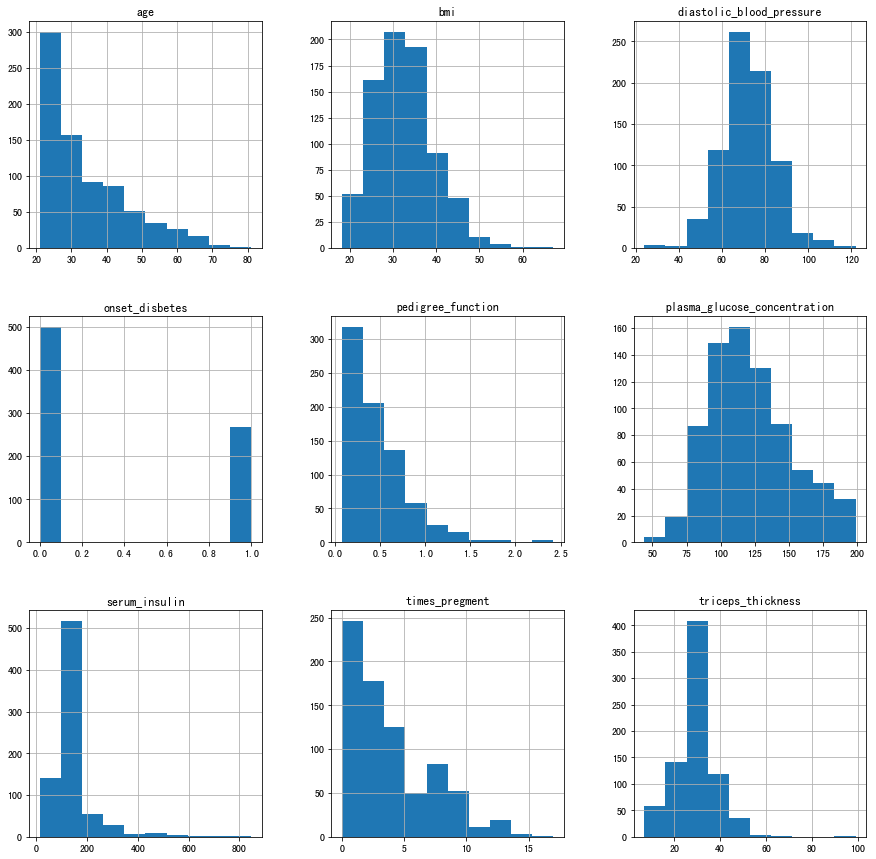

In [85]:
# 查看各变量的直方图
pima_imputed_mean.hist(figsize = (15,15))

通过上面的直方图可以看到各变量的量纲不一致，需要进行归一化，让所有的数据在一个维度上进行比较，否则得出来的模型数据不准确，甚至发生巨大的偏差。

In [91]:
# Z 分数标准化（单一特征）
from sklearn.preprocessing import StandardScaler
# 实例化方法
scaler = StandardScaler()
# pima[[plasma_glucose_concentration]] 为创建一个新的数据集，并且填充缺失值
glucose_z_score_standardscaler = scaler.fit_transform(pima[['plasma_glucose_concentration']].fillna(-9)) 
# 查看是否已经标准化数据了
round(glucose_z_score_standardscaler.mean(),1),glucose_z_score_standardscaler.std()

(-0.0, 1.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a208bf390>,
      dtype=object)

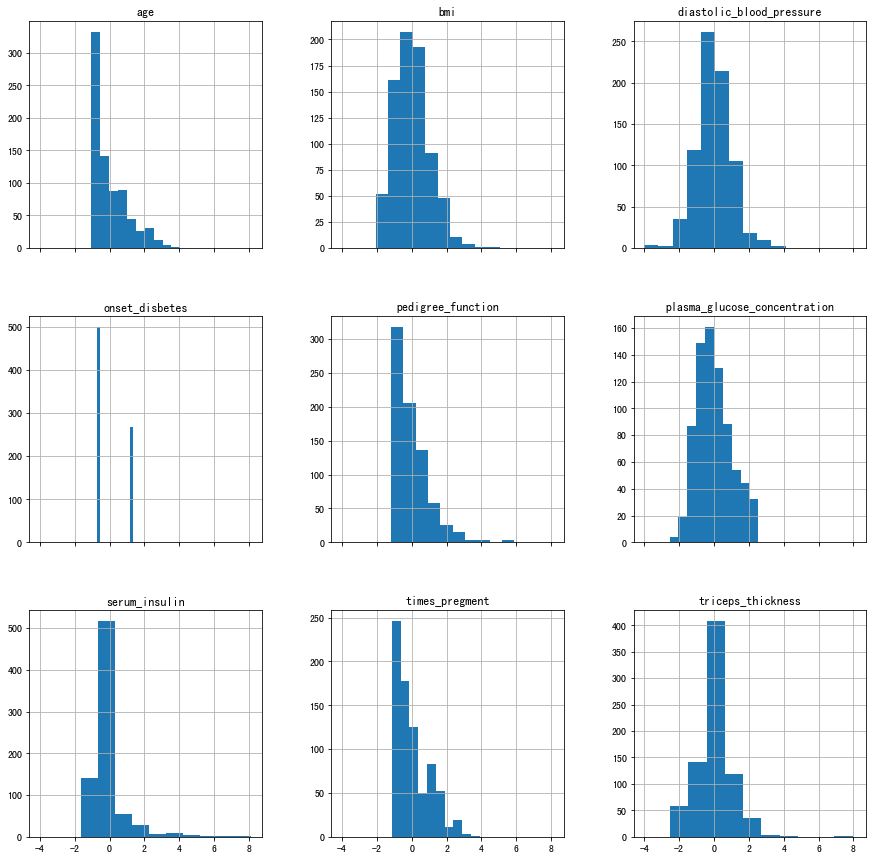

In [92]:
# Z 分数标准化（全部特征）
from sklearn.preprocessing import StandardScaler
# 实例化
scaler_pima = StandardScaler()
pima_imputed_mean_scaler = pd.DataFrame(scaler_pima.fit_transform(pima_imputed_mean),columns = pima_columns)
# 查看标准化后的分布
pima_imputed_mean_scaler.hist(figsize = (15,15),sharex = True)

## 最小-最大化

In [93]:
from sklearn.preprocessing import MinMaxScaler
# 创建min-max 标准化器
min_max_pima = MinMaxScaler()
min_max_pima_scaler = pd.DataFrame(min_max_pima.fit_transform(pima_imputed_mean),columns = pima_columns)
# 查看是否已经实现了 min-max scaler
min_max_pima_scaler.head()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [ ]:
# 行归一化
from sklearn.preprocessing import Normalizer
# 实例化方法
normalize = Normalizer()
# 使用行归一化
pima_normalized = pd.DataFrame(normalize.fit_transform(pima.fillna(-9)), columns=pima_columns)
# 查看矩阵的平均范数
np.sqrt((pima_normalized**2).sum(axis=1)).mean()

## 归一化

In [94]:
# 归一化
from sklearn.preprocessing import Normalizer
# 实例化方法
normalize = Normalizer()
# 使用行归一化
pima_normalized = pd.DataFrame(normalize.fit_transform(pima.fillna(-9)),columns = pima_columns)
# 查看矩阵的平均范数
np.sqrt((pima_normalized**2).sum(axis = 1)).mean()

1.0

In [96]:
pima_normalized.head()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,0.033509,0.826566,0.402113,0.195472,-0.050264,0.187653,0.003502,0.279245,0.005585
1,0.008400,0.713991,0.554393,0.243597,-0.075599,0.223437,0.002948,0.260397,0.000000
2,0.040314,0.922182,0.322512,-0.045353,-0.045353,0.117414,0.003386,0.161256,0.005039
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0.000000
4,0.000000,0.596381,0.174126,0.152360,0.731328,0.187620,0.009960,0.143654,0.004353


In [97]:
(pima_normalized**2).sum(axis = 1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
738    1.0
739    1.0
740    1.0
741    1.0
742    1.0
743    1.0
744    1.0
745    1.0
746    1.0
747    1.0
748    1.0
749    1.0
750    1.0
751    1.0
752    1.0
753    1.0
754    1.0
755    1.0
756    1.0
757    1.0
758    1.0
759    1.0
760    1.0
761    1.0
762    1.0
763    1.0
764    1.0
765    1.0
766    1.0
767    1.0
Length: 768, dtype: float64

# 特征构建

In [100]:
# 本次案例使用的数据集
import pandas as pd

x = pd.DataFrame({'city':['tokyo',None,'london','seattle','san fancisco','tokyo'],
                  'boolean':['y','n',None,'n','n','y'],
                  'ordinal_column':['somewhat like','like','somewhat like','like','somewhat like','dislike'],
                  'quantitative_column':[1,11,-.5,10,None,20]})
x

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,None,n,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,NaN
5,tokyo,y,dislike,20.0


In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
city                   5 non-null object
boolean                5 non-null object
ordinal_column         6 non-null object
quantitative_column    5 non-null float64
dtypes: float64(1), object(3)
memory usage: 272.0+ bytes


## 分类变量处理

In [103]:
# 填充分类变量（基于TransformerMixin 的自定义填充器，用众数填充）
from sklearn.base import TransformerMixin

class CustomCategoryImputer(TransformerMixin):
    def __init__(self,cols = None):
        self.cols = cols
        
    def fit(self,*_):
        return self
    
    def transform(self,df):
        x = df.copy()
        for col in self.cols:
            x[col].fillna(x[col].value_counts().index[0],inplace = True)
        return x

# 调用自定义的填充器
cci = CustomCategoryImputer(cols = ['city','boolean'])
cci.fit_transform(x) # 单独转换

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,tokyo,n,like,11.0
2,london,n,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,NaN
5,tokyo,y,dislike,20.0


In [106]:
# 填充数字变量（基于TransformerMixin 的自定义填充器，用平均值填充）
from sklearn.base import TransformerMixin

class CustomQuantitativeImputer(TransformerMixin):
    def __init__(self,cols = None):
        self.cols = cols
        
    def fit(self,*_):
        return self
    
    def transform(self,df):
        x = df.copy()
        impute = Imputer(strategy='mean')
        for col in self.cols:
            x[col] = impute.fit_transform(x[[col]])
            # x[col].fillna(most_frequent,inplace = True) 这一句是错的，因为Imputer 本身就是已经填充了数据了的
        return x

# 调用自定义的填充器
cqi = CustomQuantitativeImputer(cols = ['quantitative_column'])
cqi.fit_transform(x) # 单独转换

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,None,n,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,8.3
5,tokyo,y,dislike,20.0


In [109]:
# 对上面的两种填充进行流水线封装
imputer = Pipeline([
    ('quant',cqi),
    ('category',cci)
])

imputer.fit_transform(x)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,tokyo,n,like,11.0
2,london,n,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,8.3
5,tokyo,y,dislike,20.0


### one-hot encoding

In [119]:
# 类别变量的编码
class CustomDummifier(TransformerMixin):
    def __init__(self,cols = None):
        self.cols = cols 
        
    def fit(self,*_):
        return self
    
    def transform(self,x):
        return pd.get_dummies(x,columns = self.cols)
    
# 调用自定义的填充器
cd = CustomDummifier(cols = ['city','boolean'])
cd.fit_transform(x)

,ordinal_column,quantitative_column,city_london,city_san fancisco,city_seattle,city_tokyo,boolean_n,boolean_y
0,somewhat like,1.0,0,0,0,1,0,1
1,like,11.0,0,0,0,0,1,0
2,somewhat like,-0.5,1,0,0,0,0,0
3,like,10.0,0,0,1,0,1,0
4,somewhat like,NaN,0,1,0,0,1,0
5,dislike,20.0,0,0,0,1,0,1


### 标签编码

In [124]:
# 标签编码，对于定序的分类变量进行编码
class CustomOrdinal(TransformerMixin):
    def __init__(self,col,ordering = None):
        self.col = col 
        self.ordering = ordering
        
    def fit(self,*_):
        return self
    
    def transform(self,df):
        x = df.copy()
#         for col in self.cols:
#             x[col] = x[col].map(lambda self: self.ordering.index())
#         return x
        x[self.col] = x[self.col].map(lambda x: self.ordering.index(x))
        return x
    
# 调用自定义的标签编码
# co = CustomOrdinal(col = ['ordinal_column'],ordering = ['dislike','somewhat like','like']) # 这一句会报错 ，DataFrame has no attribute 'map'
co = CustomOrdinal(col = 'ordinal_column',ordering = ['dislike','somewhat like','like']) 
# 的确是这样，['ordinal_column'] 到了transform 函数那里就变成了x[['ordinal_column']] ,变成了一个新的数据框。
co.fit_transform(x)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,1,1.0
1,None,n,2,11.0
2,london,None,1,-0.5
3,seattle,n,2,10.0
4,san fancisco,n,1,NaN
5,tokyo,y,0,20.0


### 数值变量处理 CUT 函数

In [129]:
class CustomNumber(TransformerMixin):
    def __init__(self,col,bins,labels = False): # False 和 None 一样吗？参考文档 https://blog.csdn.net/xiaminli/article/details/73381355
        self.col = col 
        self.bins = bins
        self.labels = labels
        
    def fit(self,*_):
        return self
    
    def transform(self,df):
        x = df.copy()
        x[self.col] = pd.cut(x[self.col],bins = self.bins,labels=self.labels)
        return x
    
# 调用自定义的数值变量函数
cn = CustomNumber(col = 'quantitative_column',bins=3)
cn.fit_transform(x)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,0.0
1,None,n,like,1.0
2,london,None,somewhat like,0.0
3,seattle,n,like,1.0
4,san fancisco,n,somewhat like,NaN
5,tokyo,y,dislike,2.0


In [130]:
# 流水线封装，将上述自定义的对类别变量处理的类封装到 Pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('imputer',imputer),
    ('dummy',cd),
    ('ordinal',co),
    ('number',cn),
    ])

# 直接对上述封装进行  fit_transform
pipe.fit_transform(x)

,ordinal_column,quantitative_column,city_london,city_san fancisco,city_seattle,city_tokyo,boolean_n,boolean_y
0,1,0,0,0,0,1,0,1
1,2,1,0,0,0,1,1,0
2,1,0,1,0,0,0,1,0
3,2,1,0,0,1,0,1,0
4,1,1,0,1,0,0,1,0
5,0,2,0,0,0,1,0,1


## 数值变量扩展

In [133]:
# 人体胸部加速度数据集,标签activity的数值为1-7
'''
1-在电脑前工作
2-站立、走路和上下楼梯
3-站立
4-走路
5-上下楼梯
6-与人边走边聊
7-站立着说话

'''

df = pd.read_csv('Feature Engineering-0912/data/activity_recognizer/1.csv')
df.columns = ['index','x','y','z','activity']
df.head()

,index,x,y,z,activity
0,1.0,1667,2072,2047,1
1,2.0,1611,1957,1906,1
2,3.0,1601,1939,1831,1
3,4.0,1643,1965,1879,1
4,5.0,1604,1959,1921,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162500 entries, 0 to 162499
Data columns (total 5 columns):
index       162500 non-null float64
x           162500 non-null int64
y           162500 non-null int64
z           162500 non-null int64
activity    162500 non-null int64
dtypes: float64(1), int64(4)
memory usage: 6.2 MB


In [139]:
# 扩展数值特征
from sklearn.preprocessing import PolynomialFeatures

x = df[['x','y','z']]
y = df['activity']

poly = PolynomialFeatures(degree = 2,include_bias = False,interaction_only = False)
x_poly = poly.fit_transform(x)
new_data = pd.DataFrame(x_poly,columns = poly.get_feature_names())
new_data

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1667.0,2072.0,2047.0,2778889.0,3454024.0,3412349.0,4293184.0,4241384.0,4190209.0
1,1611.0,1957.0,1906.0,2595321.0,3152727.0,3070566.0,3829849.0,3730042.0,3632836.0
2,1601.0,1939.0,1831.0,2563201.0,3104339.0,2931431.0,3759721.0,3550309.0,3352561.0
3,1643.0,1965.0,1879.0,2699449.0,3228495.0,3087197.0,3861225.0,3692235.0,3530641.0
4,1604.0,1959.0,1921.0,2572816.0,3142236.0,3081284.0,3837681.0,3763239.0,3690241.0
5,1640.0,1829.0,1940.0,2689600.0,2999560.0,3181600.0,3345241.0,3548260.0,3763600.0
6,1607.0,1910.0,1910.0,2582449.0,3069370.0,3069370.0,3648100.0,3648100.0,3648100.0
7,1546.0,2045.0,1910.0,2390116.0,3161570.0,2952860.0,4182025.0,3905950.0,3648100.0
8,1529.0,2049.0,1972.0,2337841.0,3132921.0,3015188.0,4198401.0,4040628.0,3888784.0
9,1637.0,1978.0,1945.0,2679769.0,3237986.0,3183965.0,3912484.0,3847210.0,3783025.0


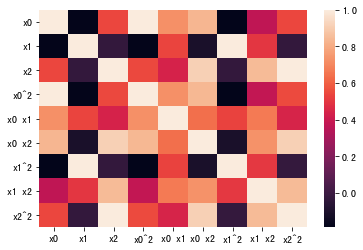

In [140]:
# 查看热力图，颜色越深代表相关性越强
%matplotlib inline
import seaborn as sns

sns.heatmap(new_data.corr())

In [145]:
# 在流水线中实现流程包装
# 导入相关库
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# params = {'poly_features__degree':[1,2,3],
#           'poly_features__interaction_only':[True,False],
#          'classify__n_neighbors':[3,4,5,6]}

# pipeline = Pipeline([
#     ('poly',poly),
#     ('knn',knn),
# ])

# 上面的代码是错的，不可以随便取名，必须要保证名称一致
params = {'poly_features__degree':[1,2,3],
          'poly_features__interaction_only':[True,False],
         'classify__n_neighbors':[3,4,5,6]}

pipeline = Pipeline([
    ('poly_features',poly),
    ('classify',knn),
])

grid = GridSearchCV(pipeline,param_grid=params)
grid.fit(x,y) # 训练数据
# 查看最佳分数和最佳参数
print(grid.best_score_,grid.best_params_)

/Users/wh-js/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.7207323076923077 {'classify__n_neighbors': 5, 'poly_features__degree': 3, 'poly_features__interaction_only': False}


## 文本变量处理

# 特征选择

In [148]:
# 将一些模型指标封装起来，方便后续使用
from sklearn.model_selection import GridSearchCV

def get_best_model_accuracy(model,params,x,y):
    grid = GridSearchCV(model,params,error_score=0)
    grid.fit(x,y)
    
    # 经典的性能指标
    print("最佳的accuracy是：{}".format(grid.best_score_))
    # best_params
    print("best params:{}".format(grid.best_params_))
    # 拟合的平均时间
    print('Average time to fit(s):{}'.format(grid.cv_results_['mean_fit_time'].mean()))
    # 预测的平均时间
    print('Average time to score(s):{}'.format(grid.cv_results_['mean_score_time'].mean()))
    
# 调用上面的指标
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()

params = {'poly_features__degree':[1,2,3],
          'poly_features__interaction_only':[True,False],
         'classify__n_neighbors':[3,4,5,6]}

pipeline = Pipeline([
    ('poly_features',poly),
    ('classify',knn),
])

get_best_model_accuracy(pipeline,params,x,y)

/Users/wh-js/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


最佳的accuracy是：0.7207323076923077
best params:{'classify__n_neighbors': 5, 'poly_features__degree': 3, 'poly_features__interaction_only': False}
Average time to fit(s):0.14842192994223702
Average time to score(s):0.4505300190713671


# 特征转换

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline 

# 在载数据集
data = load_iris()

In [2]:
irix_x,irix_y = data.data,data.target

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 理解数据（可视化数据）

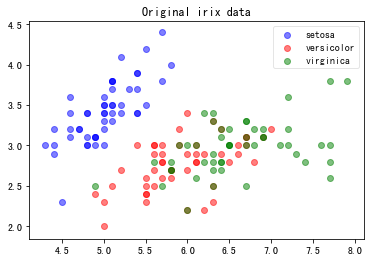

In [8]:
label_dict = {i:k for i,k in enumerate(data.target_names)}

# 创建一个函数（可视化花之间的特征）
def plot(x,y,title,x_label,y_label):
    ax = plt.subplot(111)
    for label,maker,color in zip(range(3),('^','s','o'),('blue','red','green')):
        plt.scatter(x = x[:,0].real[y == label],y = x[:,1].real[y == label],
                   color = color,
                   alpha = 0.5,
                   label = label_dict[label])
        
        plt.xlabel = x_label
        plt.ylabel = y_label
        
        leg = plt.legend(loc = 'upper right',fancybox = True)
        leg.get_frame().set_alpha(0.5)
        plt.title(title)
        
# 调用可视化函数
plot(irix_x,irix_y,'Original irix data','sepal length(cm)','sepal width(cm)')

In [9]:
# sklearn 中的 PCA
from sklearn.decomposition import PCA

# 实例化 pca
pca = PCA(n_components = 2)
pca.fit(irix_x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [11]:
# 将原始数据投影到新的数据集上
b = pca.transform(irix_x)

In [13]:
b[:5,] 

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

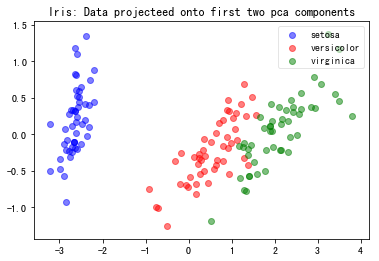

In [14]:
# 对已经降唯的数据（PCA） 进行数据可视化
plot(b,irix_y,'Iris: Data projecteed onto first two pca components','PCA1','PCA2')

In [16]:
import seaborn as sns
import numpy as np

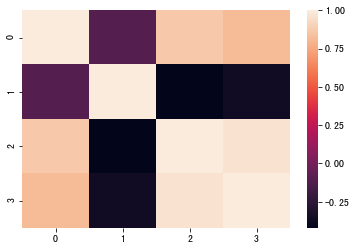

In [17]:
b = np.corrcoef(irix_x.T)
sns.heatmap(b)

In [20]:
b

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [21]:
# 对角线上的相关系数
b[[0,0,0,1,1],[1,2,3,2,3]]

array([-0.10936925,  0.87175416,  0.81795363, -0.4205161 , -0.35654409])

# sonton 特征工程学习

In [264]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [265]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


数据集的划分层级一定要一样，比如在训练集中0和1的比例在70%和30%，那么测试集中也要是相应的比例。在这里就用到了 sklearn的 StratifiedKFold。

In [195]:
import numpy as np
from sklearn.model_selection import StratifiedKFold,train_test_split
x = np.random.randn(100,10)
y = np.random.randint(0,2,size = 100)

# 随机划分
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3)

In [196]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x,y)
for train_index,test_index in skf.split(x,y):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]

In [158]:
x_train.shape

(50, 10)

In [159]:
x_test.shape

(50, 10)

In [160]:
y_train.shape

(50,)

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [197]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [266]:
# categorical variables
# 将分类变量转换为数字变量，并且存储到字典中，需要使用的时候，再导出来。
import pickle

# 将字符变量转化为数字，并且将其保存到字典中
def str2int(column_data):
    varibles = {}
    unique_column = np.unique(column_data) # 不重复地给每一个值进行数值的转换，如果相同的，那么还是同样的数字
    for i,value in enumerate(unique_column,start = 1): # 从1开始
        varibles[value] = i
    return varibles
    
    
# 判断 DataFrame 中哪列 object 对象需要转换成 str 对象，将其转换，并且转换成 int 类型的数据
def varibles(data):
    varibles_columns = {}
    var_types = data.dtypes
    # 将属于 object 对象的列转换成 str 对象
    var_object = np.where(var_types == 'object')
    var_object_list = var_types.iloc[var_object].index.tolist()
    for var in var_object_list:
        # varibles_columns[var] = str2int(varibles_columns[var].astype("str"))
        # 看了半天，没看出来是data这里输错了，字典里面本来就是空值，如果按照上述的写法来看，永远都是空值，会导致key error
        varibles_columns[var] = str2int(data[var].astype("str")) 
    return var_object_list,varibles_columns

In [267]:
# 应用上述的函数
var_object_list,varibles_columns = varibles(df_train) 
print(var_object_list)
print(varibles_columns)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'target']
{'workclass': {' ?': 1, ' Federal-gov': 2, ' Local-gov': 3, ' Never-worked': 4, ' Private': 5, ' Self-emp-inc': 6, ' Self-emp-not-inc': 7, ' State-gov': 8, ' Without-pay': 9}, 'education': {' 10th': 1, ' 11th': 2, ' 12th': 3, ' 1st-4th': 4, ' 5th-6th': 5, ' 7th-8th': 6, ' 9th': 7, ' Assoc-acdm': 8, ' Assoc-voc': 9, ' Bachelors': 10, ' Doctorate': 11, ' HS-grad': 12, ' Masters': 13, ' Preschool': 14, ' Prof-school': 15, ' Some-college': 16}, 'marital-status': {' Divorced': 1, ' Married-AF-spouse': 2, ' Married-civ-spouse': 3, ' Married-spouse-absent': 4, ' Never-married': 5, ' Separated': 6, ' Widowed': 7}, 'occupation': {' ?': 1, ' Adm-clerical': 2, ' Armed-Forces': 3, ' Craft-repair': 4, ' Exec-managerial': 5, ' Farming-fishing': 6, ' Handlers-cleaners': 7, ' Machine-op-inspct': 8, ' Other-service': 9, ' Priv-house-serv': 10, ' Prof-specialty': 11, ' Protective-serv': 

In [268]:
# 将上面转换过的数值列保存到一个文件中，需要的时候，再提取出来
with open('varibles_columns.plk','wb') as handle:
    pickle.dump(varibles_columns,handle)
    
# 提取文件
# with open('variable_str2int.plk','rb') as handle:
#     variable_str2int_load = pickle.load(handle)
    
with open('varibles_columns.plk','rb') as handle: # 搞了半天越来是这里文件输错了，读取的文件不一致。
    variable_str2int_load = pickle.load(handle)
    
# 将数值应用到 DataFrame 中
for var in var_object_list:
    df_train[var] = df_train[var].apply(lambda x: variable_str2int_load[var].get(x))
    df_test[var] = df_test[var].apply(lambda x: variable_str2int_load[var].get(x))

In [273]:
df_train

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,8,77516,10,13,5,2,2,5,2,2174,0,40,40,1
1,50,7,83311,10,13,3,5,1,5,2,0,0,13,40,1
2,38,5,215646,12,9,1,7,2,5,2,0,0,40,40,1
3,53,5,234721,2,7,3,7,1,3,2,0,0,40,40,1
4,28,5,338409,10,13,3,11,6,3,1,0,0,40,6,1
5,37,5,284582,13,14,3,5,6,5,1,0,0,40,40,1
6,49,5,160187,7,5,4,9,2,3,1,0,0,16,24,1
7,52,7,209642,12,9,3,5,1,5,2,0,0,45,40,2
8,31,5,45781,13,14,5,11,2,5,1,14084,0,50,40,2
9,42,5,159449,10,13,3,5,1,5,2,5178,0,40,40,2


In [274]:
df_test # 这里target 后面的数值都为 None 是因为前期在处理的时候 df_train & df_test 的 target 数值不一样，df_test 后面多了一个点。

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,5,226802,2,7,5,8,4,3,2,0,0,40,40,None
1,38,5,89814,12,9,3,6,1,5,2,0,0,50,40,None
2,28,3,336951,8,12,3,12,1,5,2,0,0,40,40,None
3,44,5,160323,16,10,3,8,1,3,2,7688,0,40,40,None
4,18,1,103497,16,10,5,1,4,5,1,0,0,30,40,None
5,34,5,198693,1,6,5,9,2,5,2,0,0,30,40,None
6,29,1,227026,12,9,5,1,5,3,2,0,0,40,40,None
7,63,7,104626,15,15,3,11,1,5,2,3103,0,32,40,None
8,24,5,369667,16,10,5,9,5,5,1,0,0,40,40,None
9,55,5,104996,6,4,3,4,1,5,2,0,0,10,40,None
